In [ ]:
import torch
import numpy as np
import pandas as pd
import pickle
import torch
import torch.nn as nn
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
root= '/novo/omdb/pds02/PDS2843/data/sprint_tid_ascvd/gzn/thesis/data/'
df = pd.read_csv(root+'ppi_sc_st_4.csv')
disease_root = '/novo/omdb/pds02/PDS2843/data/sprint_tid_ascvd/gzn/thesis/HBDM/data/disease/'


In [3]:
genticpath = '/novo/omdb/pds02/PDS2843/data/sprint_tid_ascvd/gzn/310_targets/CAD-Genetic-Target-Discovery-2023_010323.xlsx'
geneticdf=pd.read_excel(genticpath,sheet_name='MASTER')
pos_genes = geneticdf['Gene']

In [6]:
pos_genes

0       CELSR2
1        PSRC1
2        SORT1
3      GOLPH3L
4         CTSS
        ...   
378      TRIM5
379      ITGB5
380       XPO6
381     ZC3HC1
382       ZNF3
Name: Gene, Length: 383, dtype: object

In [20]:
root= '/novo/omdb/pds02/PDS2843/data/sprint_tid_ascvd/gzn/thesis/data/'
df = pd.read_csv(root+'ppi_sc_st_4.csv')
disease_root = '/novo/omdb/pds02/PDS2843/data/sprint_tid_ascvd/gzn/thesis/HBDM/data/disease/'
disease_source = 'DIS_CAD'
diseasedf = pd.read_csv(disease_root+disease_source+'.tsv',sep='\t')
pos_genes = diseasedf['Gene']
df['label1'] = df['gene'].apply(lambda x: 1 if x in pos_genes.to_list() else 0)
disease_source = 'OT_CAD'
diseasedf = pd.read_csv(disease_root+disease_source+'.tsv',sep='\t')
pos_genes = diseasedf['symbol']
df['label2'] = df['gene'].apply(lambda x: 1 if x in pos_genes.to_list() else 0)
disease_source = 'cad_literature'
diseasedf = pd.read_csv(disease_root+disease_source+'.csv')
pos_genes = diseasedf['gene']
df['label3'] = df['gene'].apply(lambda x: 1 if x in pos_genes.to_list() else 0)
genticpath = '/novo/omdb/pds02/PDS2843/data/sprint_tid_ascvd/gzn/310_targets/CAD-Genetic-Target-Discovery-2023_010323.xlsx'
geneticdf=pd.read_excel(genticpath,sheet_name='MASTER')
pos_genes = geneticdf['Gene']
df['label4'] = df['gene'].apply(lambda x: 1 if x in pos_genes.to_list() else 0)


y1 = df['label1'].to_numpy()
y2 = df['label2'].to_numpy()
y3 = df['label3'].to_numpy()
y4 = df['label4'].to_numpy()
filtered_df = df.filter(regex='^(ppi|sc|st)')
X = filtered_df.to_numpy()

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
df_pca = pca.transform(X)
# Compute the Z-score for each data point
z_scores = np.abs((df_pca - np.mean(df_pca)) / np.std(df_pca))

# Set a threshold for the Z-score
threshold = 3

# Find the indices of the data points with a Z-score greater than the threshold
outlier_indices = np.where(np.logical_or(z_scores[:, 0] > threshold, z_scores[:, 1] > threshold))[0]

# Drop the outliers from df_pca and group
df_pca_clean = np.delete(df_pca, outlier_indices, axis=0)

In [53]:
def get_scatter(label):
    group_clean = np.delete(label, outlier_indices)

    # Define the x and y coordinates for each dataset
    pca_pos = df_pca_clean[np.where(group_clean == 1.)[0]]
    pca_other = df_pca_clean[np.where(group_clean == 0.)[0]]

    # Create a new figure and two axis objects side by side
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))

    # Plot the pca_other data in the first plot with blue color
    ax1.scatter(pca_other[:,0], pca_other[:,1], color='blue', label='Other',s = 0.5)

    # Set the x and y axis limits for the first plot
    ax1.set_xlim([min(df_pca_clean[:,0]), max(df_pca_clean[:,0])])
    ax1.set_ylim([min(df_pca_clean[:,1]), max(df_pca_clean[:,1])])

    # Add a legend to the first plot
    ax1.legend()

    # Plot the pca_pos data in the second plot with red color
    ax2.scatter(pca_pos[:,0], pca_pos[:,1], color='red', label='Pos',s = 0.5)

    # Set the x and y axis limits for the second plot
    ax2.set_xlim([min(df_pca_clean[:,0]), max(df_pca_clean[:,0])])
    ax2.set_ylim([min(df_pca_clean[:,1]), max(df_pca_clean[:,1])])

    # Add a legend to the second plot
    ax2.legend()

    # Show the plot
    plt.show()


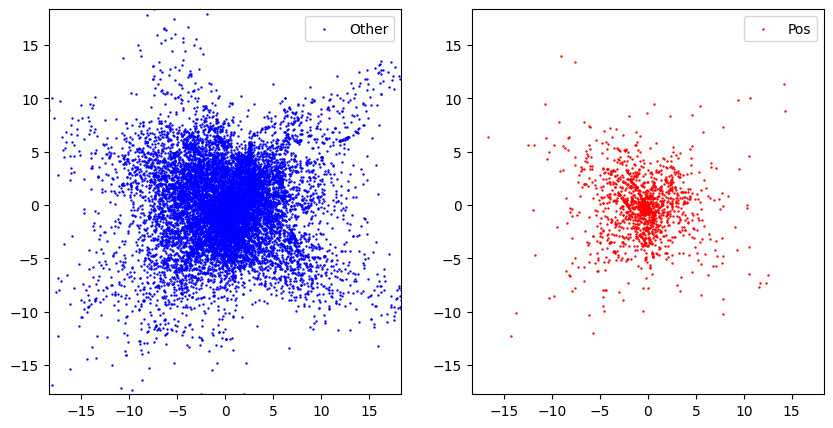

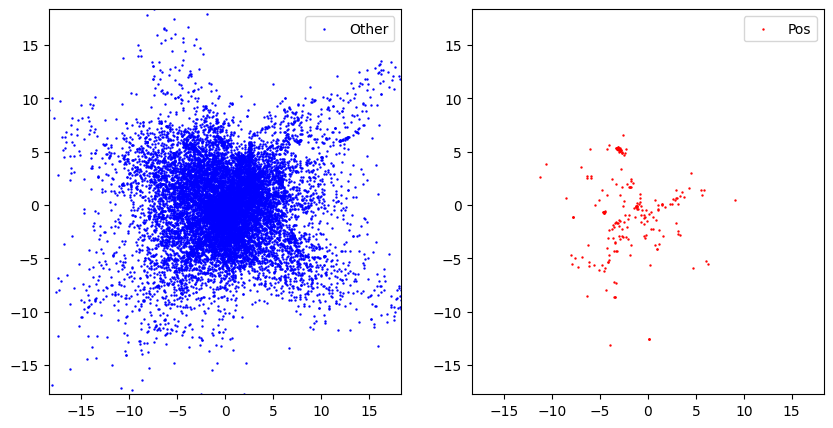

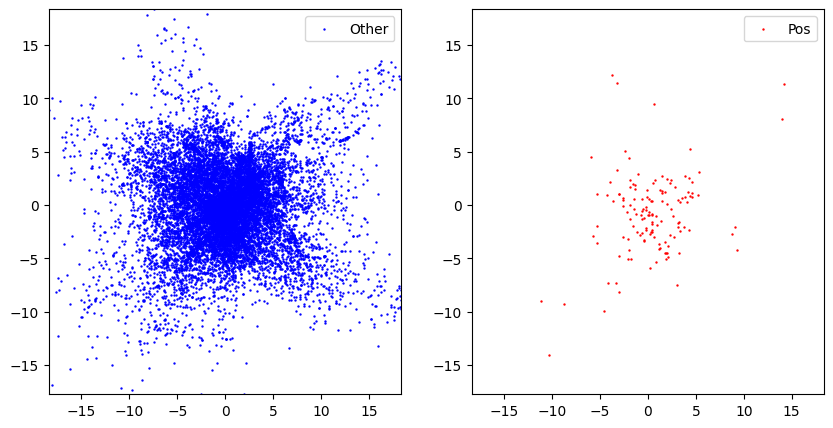

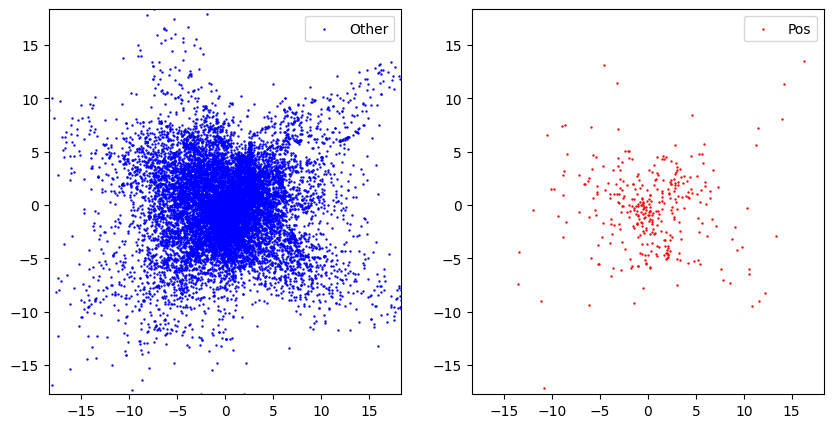

In [55]:
get_scatter(y1)
get_scatter(y2)
get_scatter(y3)
get_scatter(y4)

In [49]:
pca_other.shape

(1368, 2)

In [50]:
pca_pos.shape

(13650, 2)

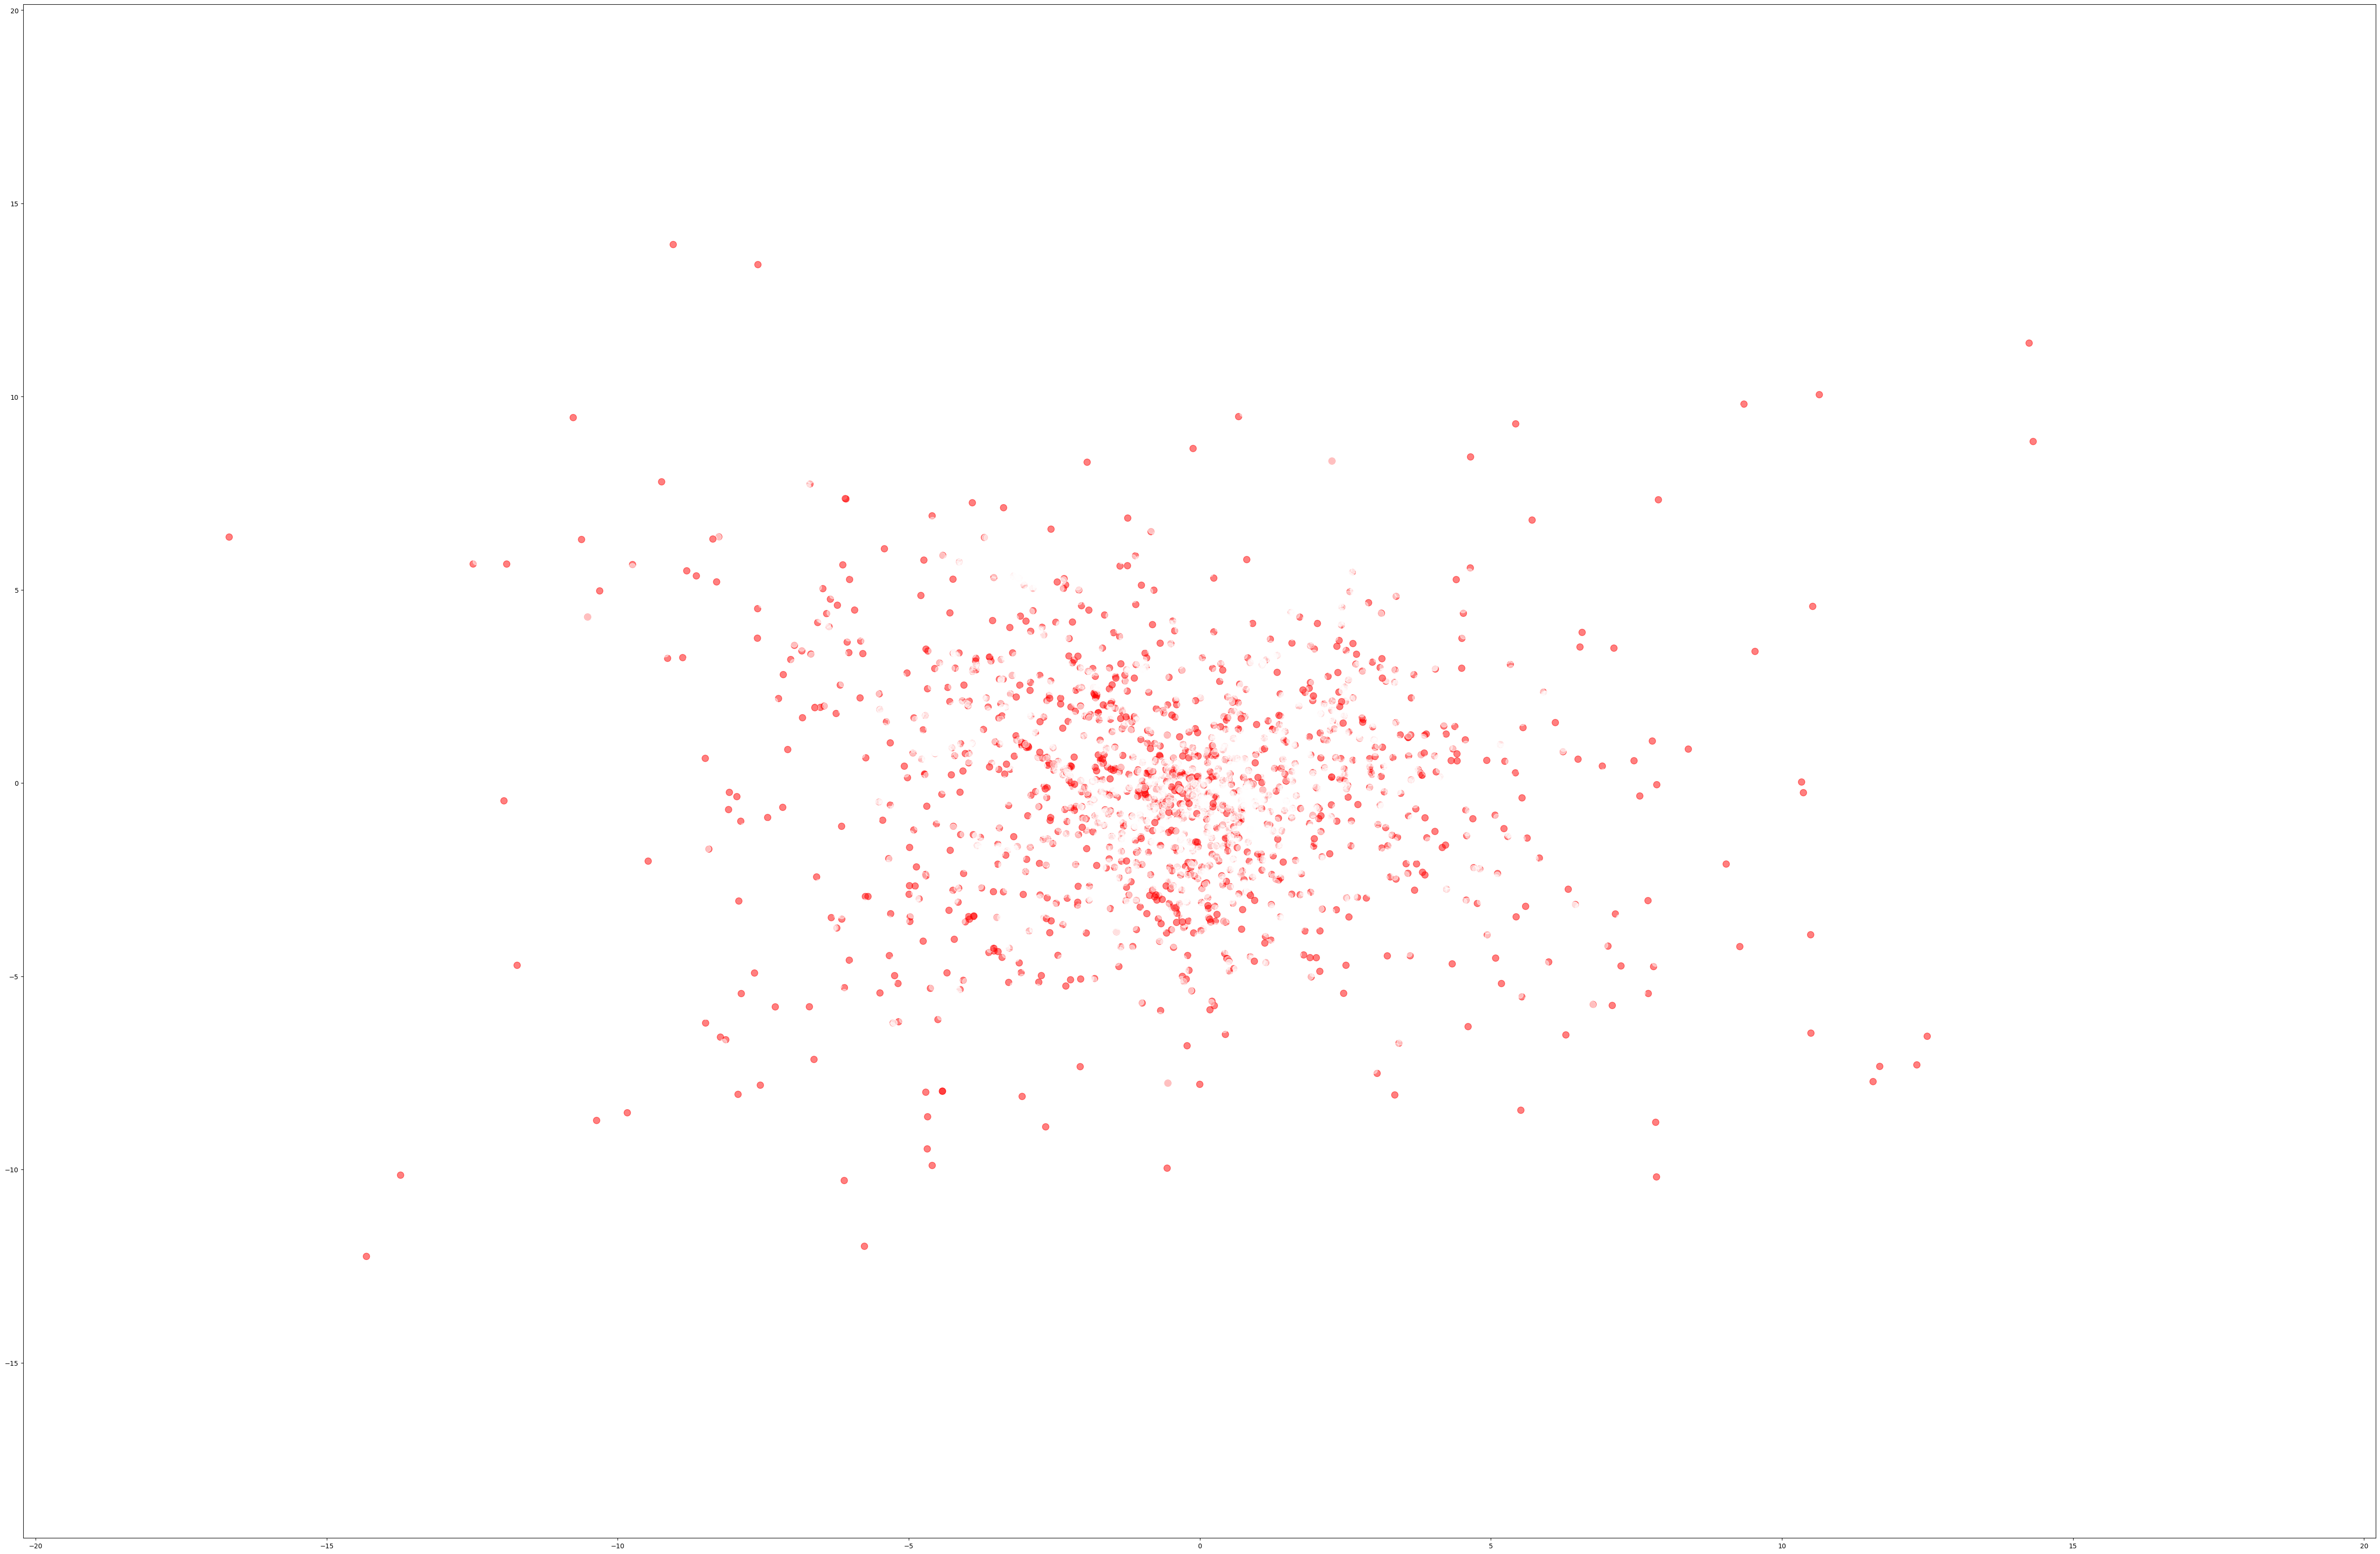

In [46]:
colors = ['red' if g == 1 else 'white' for g in group_clean]
fig = plt.figure(figsize=(64, 42)) # create a figure with width 8 inches and height 6 inches
plt.scatter(df_pca_clean[:, 0], df_pca_clean[:, 1], c=colors, alpha=0.5, s=100)
plt.show()

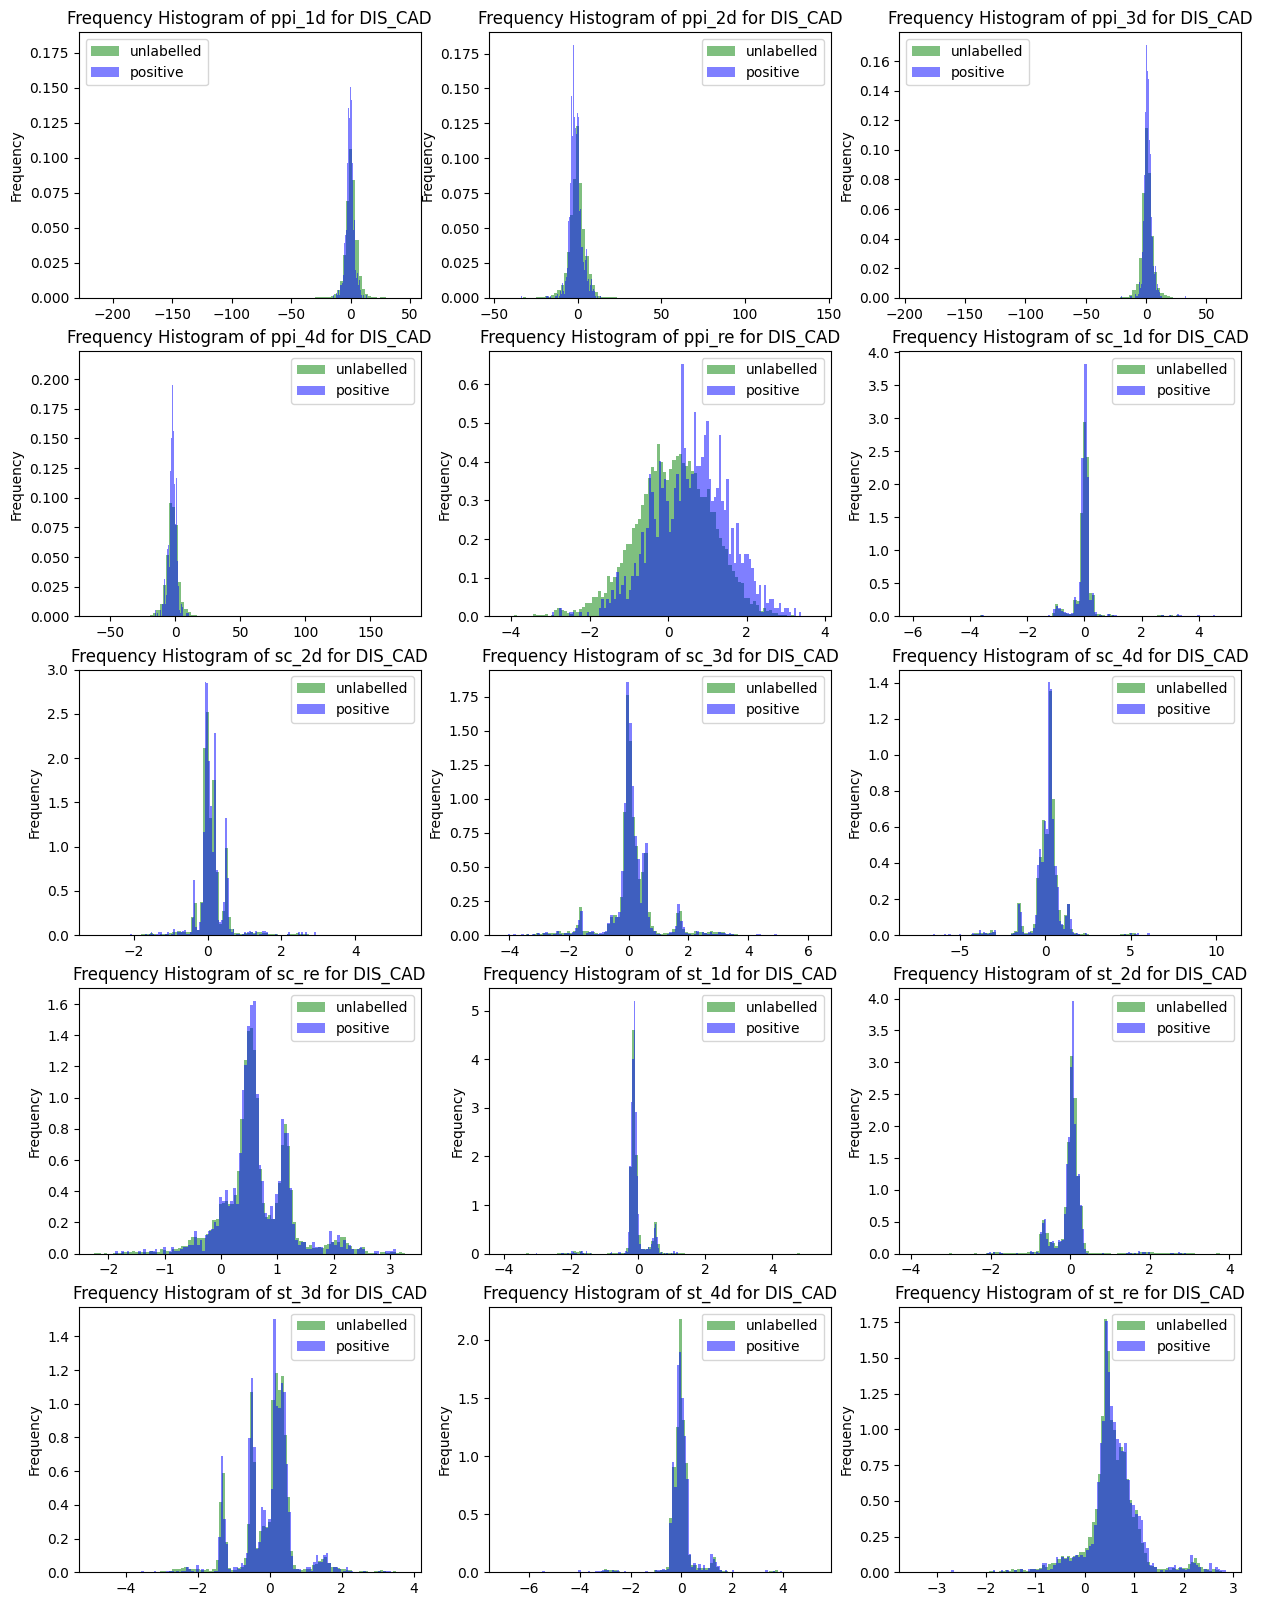

In [13]:
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))

# Flatten the axs array for easier indexing
axs = axs.flatten()

for i, col in enumerate(['ppi_1d', 'ppi_2d', 'ppi_3d', 'ppi_4d', 'ppi_re', 'sc_1d', 'sc_2d','sc_3d', 'sc_4d', 'sc_re', 'st_1d', 'st_2d', 'st_3d', 'st_4d', 'st_re']):
    x1 = df[df['label']==0][col]
    x2 = df[df['label']==1][col]

    kwargs = dict(alpha=0.5, bins=100, density=True, stacked=True)

    axs[i].hist(x1, **kwargs, color='g', label='unlabelled')
    axs[i].hist(x2, **kwargs, color='b', label='positive')
    axs[i].set(title=f'Frequency Histogram of {col} for {disease_source}', ylabel='Frequency')
    axs[i].legend()

# Remove the unused subplots
for i in range(len(axs), len(axs.flatten()), -1):
    fig.delaxes(axs[i-1])

plt.show()

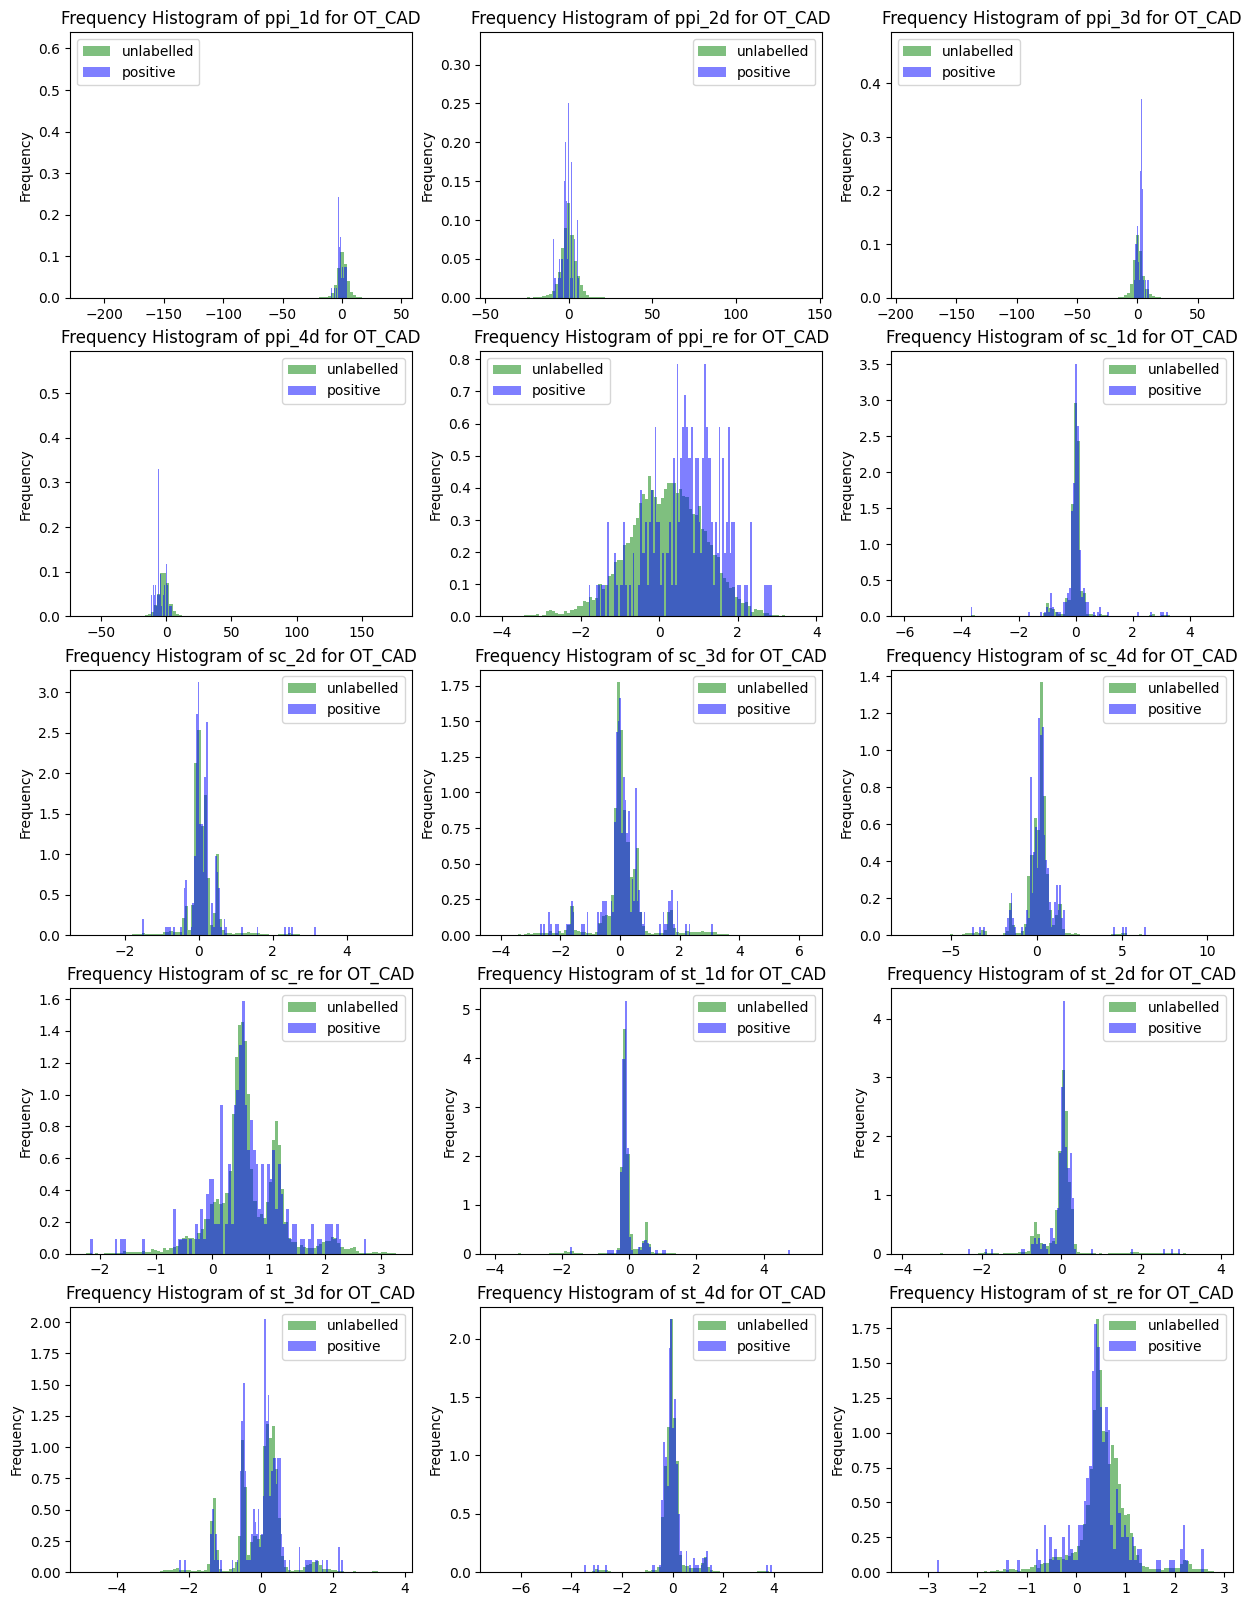

In [14]:
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))

# Flatten the axs array for easier indexing
axs = axs.flatten()

for i, col in enumerate(['ppi_1d', 'ppi_2d', 'ppi_3d', 'ppi_4d', 'ppi_re', 'sc_1d', 'sc_2d','sc_3d', 'sc_4d', 'sc_re', 'st_1d', 'st_2d', 'st_3d', 'st_4d', 'st_re']):
    x1 = df[df['label']==0][col]
    x2 = df[df['label']==1][col]

    kwargs = dict(alpha=0.5, bins=100, density=True, stacked=True)

    axs[i].hist(x1, **kwargs, color='g', label='unlabelled')
    axs[i].hist(x2, **kwargs, color='b', label='positive')
    axs[i].set(title=f'Frequency Histogram of {col} for {disease_source}', ylabel='Frequency')
    axs[i].legend()

# Remove the unused subplots
for i in range(len(axs), len(axs.flatten()), -1):
    fig.delaxes(axs[i-1])

plt.show()

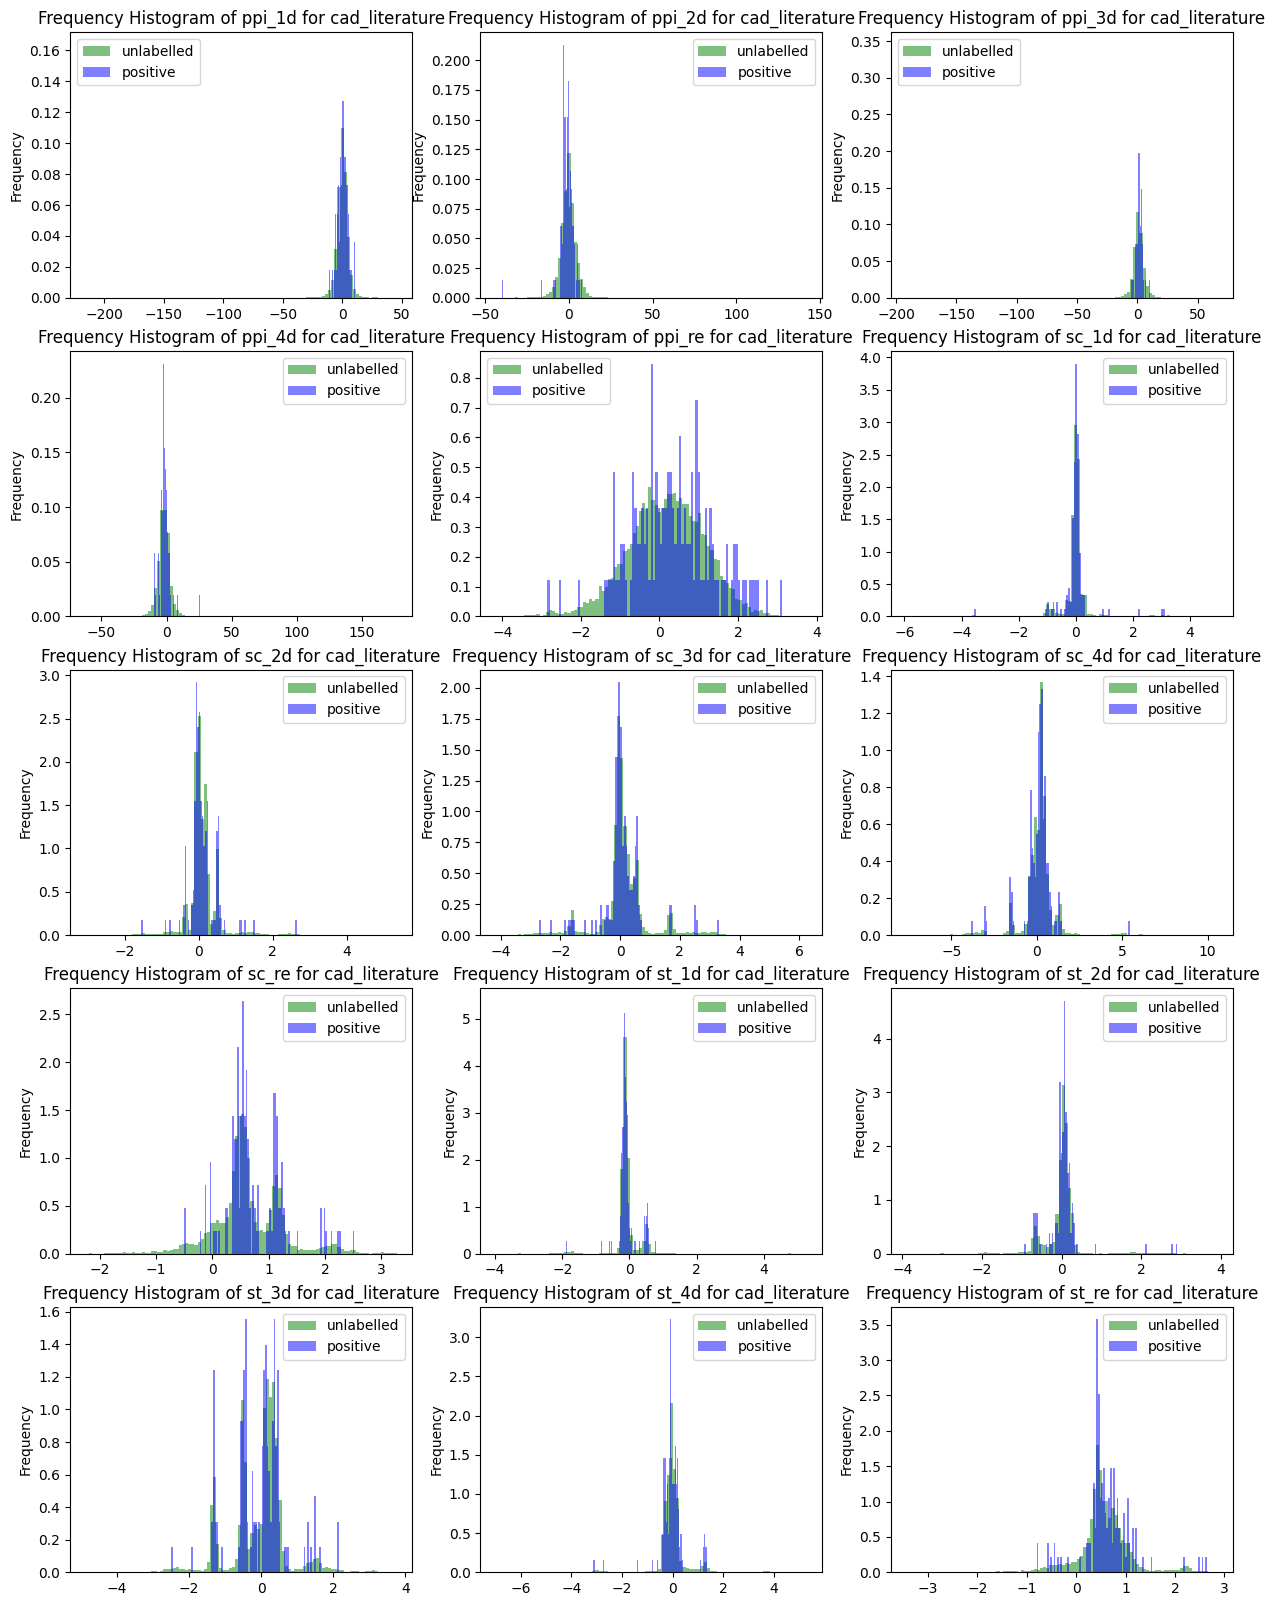

In [15]:

fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))

# Flatten the axs array for easier indexing
axs = axs.flatten()

for i, col in enumerate(['ppi_1d', 'ppi_2d', 'ppi_3d', 'ppi_4d', 'ppi_re', 'sc_1d', 'sc_2d','sc_3d', 'sc_4d', 'sc_re', 'st_1d', 'st_2d', 'st_3d', 'st_4d', 'st_re']):
    x1 = df[df['label']==0][col]
    x2 = df[df['label']==1][col]

    kwargs = dict(alpha=0.5, bins=100, density=True, stacked=True)

    axs[i].hist(x1, **kwargs, color='g', label='unlabelled')
    axs[i].hist(x2, **kwargs, color='b', label='positive')
    axs[i].set(title=f'Frequency Histogram of {col} for {disease_source}', ylabel='Frequency')
    axs[i].legend()

# Remove the unused subplots
for i in range(len(axs), len(axs.flatten()), -1):
    fig.delaxes(axs[i-1])

plt.show()

In [17]:
df.columns

Index(['ppi_1d', 'ppi_2d', 'ppi_3d', 'ppi_4d', 'ppi_re', 'gene', 'sc_1d',
       'sc_2d', 'sc_3d', 'sc_4d', 'sc_re', 'st_1d', 'st_2d', 'st_3d', 'st_4d',
       'st_re', 'label'],
      dtype='object')

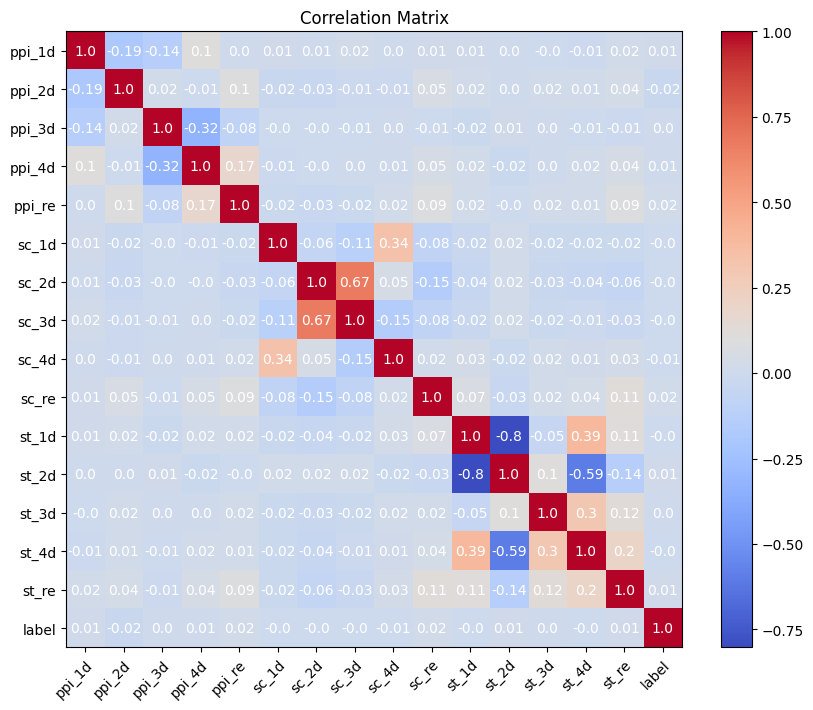

In [18]:
# Create a correlation matrix
corr = df[['ppi_1d', 'ppi_2d', 'ppi_3d', 'ppi_4d', 'ppi_re', 'sc_1d',
       'sc_2d', 'sc_3d', 'sc_4d', 'sc_re', 'st_1d', 'st_2d', 'st_3d', 'st_4d',
       'st_re', 'label']].corr()

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 8))

# Draw the correlation matrix
im = ax.imshow(corr, cmap='coolwarm')

# Add a colorbar to the figure
cbar = ax.figure.colorbar(im, ax=ax)

# Set the title and axis labels
ax.set_title('Correlation Matrix')
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the x-axis labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = ax.text(j, i, round(corr.iloc[i, j], 2),
                       ha="center", va="center", color="w")

# Show the plot
plt.show()

In [ ]:
filtered_df

In [ ]:
local_stringdb = '/novo/omdb/pds02/PDS2843/data/sprint_tid_ascvd/data/string/lfs-stringdb/'
# load local STRING database and names
stringdf = pd.read_csv(local_stringdb+'9606.protein.info.v12.0.txt', sep='\t', header=0, usecols=['#string_protein_id', 'preferred_name'])
stringdf['preferred_name'] = stringdf['preferred_name'].str.upper()
stringId2name = stringdf.set_index('#string_protein_id')['preferred_name'].to_dict()
name2stringId = stringdf.set_index('preferred_name')['#string_protein_id'].to_dict()
stringdf = pd.read_csv(local_stringdb+'9606.protein.aliases.v12.0.txt', sep='\t', header=0, usecols=['#string_protein_id', 'alias']).drop_duplicates(['alias'], keep='first')
stringdf['alias'] = stringdf['alias'].str.upper()
aliases2stringId = stringdf.set_index('alias')['#string_protein_id'].to_dict()

In [ ]:
def get_df(dataset):

    files_path = '/novo/omdb/pds02/PDS2843/data/sprint_tid_ascvd/gzn/thesis/HBDM/results/models/Dataset-'+dataset+'--RE-True--W-True--Epochs-15000--D-4--RH-25--LR-0.1--LP-False--CUDA-True/'
    path1 = files_path + 'latent.pkl'
    path2 = files_path + 'RE.pkl'

    with open(path1, 'rb') as file:
        latent = pickle.load(file)
    latent = np.array(latent)
    with open(path2, 'rb') as file:
        re = pickle.load(file)
    re = np.array(re)

    convertpath = '/novo/omdb/pds02/PDS2843/data/sprint_tid_ascvd/gzn/thesis/HBDM/data/datasets/'+dataset+'/ppi_index.pkl'
    with open(convertpath, 'rb') as file:
        ppi_index = pickle.load(file)
    data = np.concatenate((latent, re[:, np.newaxis]), axis=1)
    df_latent = pd.DataFrame()
    for i, d in enumerate(range(data.shape[1])):
        if i == len(range(data.shape[1]))-1:
            col_name = 're'
        else:
            col_name = str(d+1)+'d'
        df_latent[col_name] = data.T[d]
    df_latent['node'] = df_latent.index
    inv_dict = {v: k for k, v in ppi_index.items()}
    df_latent = df_latent.add_prefix(dataset+'_')
    df_latent['gene'] = df_latent[dataset+'_node'].map(inv_dict)
    df = df_latent.loc[:, ~df_latent.columns.str.endswith('node')]
    return df

In [ ]:
ppidf = get_df('ppi')
scdf = get_df('sc')
stdf = get_df('st')
df = pd.merge(ppidf,scdf,on='gene')
df = pd.merge(df,stdf,on='gene')
print(len(ppidf),len(scdf),len(stdf),len(df))

In [ ]:
root = '/novo/omdb/pds02/PDS2843/data/sprint_tid_ascvd/gzn/thesis/HBDM/data/disease/'
disease_source = 'OT_CAD'
diseasedf = pd.read_csv(root+disease_source+'.tsv',sep='\t')
pos_genes = diseasedf['symbol']
pos_genes = pos_genes.map(aliases2stringId)
pos_genes =  pos_genes.map(stringId2name)
print(len(diseasedf),len(pos_genes))
df['label'] = df['gene'].apply(lambda x: 1 if x in pos_genes.to_list() else -1)

In [ ]:
X = df[['ppi_1d', 'ppi_2d', 'ppi_3d', 'ppi_4d', 'ppi_re','sc_1d',
       'sc_2d', 'sc_3d', 'sc_4d', 'sc_re', 'st_1d', 'st_2d', 'st_3d', 'st_4d',
       'st_re']].to_numpy()
y = df['label'].to_numpy()

permut = np.random.permutation(len(y))
X = X[permut]
y = y[permut]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train = torch.from_numpy(X_train).to(device)
y_train = torch.from_numpy(y_train).to(device)
X_test = torch.from_numpy(X_test).to(device)
y_test = torch.from_numpy(y_test).to(device)

In [ ]:
# Define the Model
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.input_layer = nn.Linear(15, 8)
        self.output_layer = nn.Linear(8, 1)
        
    def forward(self, x):
        x = torch.relu(self.input_layer(x))
        x = torch.sigmoid(self.output_layer(x))
        return x

model = NeuralNet()

# Define the Loss Function and Optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Train the Model
epochs = 1000
for epoch in range(epochs):
    inputs = torch.from_numpy(X_train).float()
    targets = torch.from_numpy(y_train).float()

    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets.unsqueeze(1))
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print("Epoch: %d, Loss: %f" % (epoch, loss.item()))

# Evaluate the Model
with torch.no_grad():
    inputs = torch.from_numpy(X_test).float()
    targets = torch.from_numpy(y_test).float()
    outputs = model(inputs)
    predicted_labels = np.round(outputs.numpy())
    f1 = f1_score(y_test, predicted_labels)

    print("F1 Score: %f" % f1)